In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm

#from mc_io_functions import load_mc_particles
#from mc_io_functions import load_mc_hits
#from mc_io_functions import load_mc_sensor_response

from invisible_cities.core.core_functions  import shift_to_bin_centers
from invisible_cities.core                 import fit_functions as fitf
#from invisible_cities.icaro.hst_functions import hist
#from invisible_cities.icaro.hst_functions import hist2d
#from invisible_cities.icaro.hst_functions import hist2d_profile
#from invisible_cities.icaro.hst_functions import labels


In [2]:
def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    y, x, p = plt.hist(*args, **kwargs)
    return y, shift_to_bin_centers(x), p


def hist2d(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    z, x, y, p = plt.hist2d(*args, **kwargs)
    return z, shift_to_bin_centers(x), shift_to_bin_centers(y), p

def hist2d_profile(x, y, z, nbinx, nbiny, xrange, yrange, **kwargs):
    """
    Create a profile 2d of the data and plot it as an histogram.
    """
    x, y, z, ze = fitf.profileXY(x, y, z, nbinx, nbiny, xrange, yrange)
    plot_output = display_matrix(x, y, z, **kwargs)
    return ((x, y, z, ze), *plot_output)

def display_matrix(x, y, z, mask=None, **kwargs):
    """
    Display the matrix z using the coordinates x and y as the bin centers.
    """
    nx = x = np.size(x)
    ny = np.size(y)

    dx = (np.max(x) - np.min(x)) / nx
    dy = (np.max(y) - np.min(y)) / ny

    x_binning = np.linspace(np.min(x) - dx, np.max(x) + dx, nx + 1)
    y_binning = np.linspace(np.min(y) - dy, np.max(y) + dy, ny + 1)

    x_ = np.repeat(x, ny)
    y_ = np.tile  (y, nx)
    z_ = z.flatten()

    if mask is None:
        mask = np.ones_like(z_, dtype=bool)
    else:
        mask = mask.flatten()
    h  = hist2d(x_[mask], y_[mask], (x_binning,
                                     y_binning),
                weights = z_[mask],
                **kwargs)
    return h, plt.colorbar()

def create_new_figure(kwargs):
    if kwargs.setdefault("new_figure", True):
        plt.figure()
    del kwargs["new_figure"]

def labels(xlabel, ylabel, title=""):
    """
    Set x and y labels.
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title ( title)
    
def EnergyRes(x):
    mu = np.mean(x)
    sigma = np.std(x)
    fwhm = 2.355*sigma/mu
    e_event = 41 # keV
    eres = fwhm*e_event
    return fwhm*100 # FWHM  # what units is this????

In [3]:
#nfiles = 2
#dirname = "/n/holystore01/LABS/guenette_lab/Users/tcontreras/nexus-production/test/"
#files = ["flex.kr83m."+str(i)+".nexus.h5" for i in range(1,2)]
#files_8 = ["/Users/taylorcontreras/Development/Research/Odyssey_sipmstudy/pitch_8mm/flex.kr83m."+str(i)+".nexus.h5" for i in range(0,nfiles)]
#config = pd.read_hdf(files[0], "MC/configuration")
tbin_sipms = 1.0 #mus
t1_s1 = 99 #  mus
t2_s1 = 102 #mus
t1_s2 = 102 #mus

test_file = ["/Users/taylorcontreras/Development/Research/trackingplane/s3mmp15mm/flex.kr83m.1.nexus.h5"]
config = pd.read_hdf(test_file[0], "MC/configuration")

In [4]:
config

,param_key,param_value
0,event_type,other
1,num_events,100
2,saved_events,100
3,interacting_events,0
4,PmtR11410_binning,0.025000 mus
5,TP_SiPM_binning,1.000000 mus
6,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
7,/PhysicsList/RegisterPhysics,G4DecayPhysics
8,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
9,/PhysicsList/RegisterPhysics,G4OpticalPhysics


In [5]:
sns_response = pd.read_hdf(test_file[0], 'MC/sns_response')
sns_positions = pd.read_hdf(test_file[0], 'MC/sns_positions')
sns_positions = sns_positions.drop_duplicates(subset='sensor_id')
sns_positions

,sensor_id,sensor_name,x,y,z
0,8,PmtR11410,-125.000000,216.506348,1468.699951
1,22,PmtR11410,-187.500000,-324.759521,1468.699951
2,23,PmtR11410,187.500000,-324.759521,1468.699951
3,37,PmtR11410,250.000000,433.012695,1468.699951
4,5,PmtR11410,62.500000,-108.253174,1468.699951
5,10,PmtR11410,-125.000000,-216.506348,1468.699951
6,55,PmtR11410,-125.121651,433.082947,1468.699951
7,1,PmtR11410,62.500000,108.253174,1468.699951
8,40,PmtR11410,-250.000000,-433.012695,1468.699951
9,31,PmtR11410,-62.581104,324.806366,1468.699951


In [6]:
pd.read_hdf(test_file[0], "MC/configuration")

,param_key,param_value
0,event_type,other
1,num_events,100
2,saved_events,100
3,interacting_events,0
4,PmtR11410_binning,0.025000 mus
5,TP_SiPM_binning,1.000000 mus
6,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
7,/PhysicsList/RegisterPhysics,G4DecayPhysics
8,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
9,/PhysicsList/RegisterPhysics,G4OpticalPhysics


In [7]:
#config

In [8]:
all_sipms = pd.DataFrame()
all_pmts = pd.DataFrame()
events_allsensors = pd.DataFrame()
events_allsipms = pd.DataFrame()
events_allpmts = pd.DataFrame()
for file in test_file:
    sns_response = pd.read_hdf(file, 'MC/sns_response')
    sns_positions = pd.read_hdf(file, 'MC/sns_positions')
    print("len of data", sns_response)
    # Sort to get the sipms
    sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
    sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]

    # Sort to sum up all charges for each sipms
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    response_byid = sipm_response.groupby('sensor_id')
    summed_charges = response_byid.agg({"charge":"sum"}) 

    # Make data frame with sipms ids, position, and total charge
    print("summed_charges:",summed_charges)
    print("sipms_positions:", sipm_positions)
    new_sipm_positions = sipm_positions.set_index('sensor_id')
    new_df = pd.concat([new_sipm_positions.iloc[:,1:5], summed_charges], axis=1)
    all_sipms = all_sipms.append(new_df)
    
    # Sum of charges in an event
    response_byevent = sns_response_sorted.groupby('event_id')
    event_charge = response_byevent.agg({"charge":"sum"})
    events_allsensors = events_allsensors.append(event_charge)
    
    # Sum of charges in sipms per event
    this = sipm_response.groupby('event_id')
    charges = this.agg({"charge":"sum"})
    events_allsipms = events_allsipms.append(charges)
    
    # pmts
    pmt_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] < 60]
    response_byid_pmt = pmt_response.groupby('sensor_id')
    summed_charges_pmt = response_byid_pmt.agg({"charge":"sum"})
    pmt_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("Pmt")]
    new_pmt_positions = pmt_positions.set_index('sensor_id')
    new_df_pmt = pd.concat([new_pmt_positions.iloc[:,1:5], summed_charges_pmt], axis=1)
    all_pmts = all_pmts.append(new_df_pmt)
    
    this_pmts = pmt_response.groupby('event_id')
    charges_pmt = this_pmts.agg({"charge":"sum"})
    events_allpmts = events_allpmts.append(charges_pmt)

len of data         event_id  sensor_id  time_bin  charge
0            100          8         0       1
1            100          8     46055       1
2            100          8     46115       1
3            100          8     46122       1
4            100          8     46136       1
5            100          8     46153       1
6            100          8     46156       1
7            100          8     46159       1
8            100          8     46167       1
9            100          8     46171       1
10           100          8     46174       1
11           100          8     46177       1
12           100          8     46187       1
13           100          8     46201       1
14           100          8     46203       1
15           100          8     46208       1
16           100          8     46218       1
17           100          8     46222       1
18           100          8     46224       2
19           100          8     46229       1
20           100      

In [51]:
from dataclasses import dataclass
from typing      import Tuple
from typing      import TypeVar
from typing      import Callable
from collections import namedtuple
from scipy.optimize          import OptimizeWarning
import warnings

from invisible_cities.evm  .ic_containers import FitFunction
from   invisible_cities.core.core_functions    import in_range
from   invisible_cities.core .stat_functions import poisson_sigma

Measurement = namedtuple('Measurement', 'value uncertainty')
Number = TypeVar('Number', None, int, float)
NN = np.nan

@dataclass
class HistoPar:
    var    : np.array
    nbins  : int
    range  : Tuple[float]
        
@dataclass
class GaussPar:
    mu    : Measurement
    std   : Measurement
    amp   : Measurement
        
@dataclass
class ProfilePar:
    x  : np.array
    y  : np.array
    xu : np.array
    yu : np.array
        
@dataclass
class FitPar(ProfilePar):
    f     : FitFunction
        
@dataclass
class FitResult:
    par   : np.array
    err   : np.array
    chi2  : float
    valid : bool
        
@dataclass
class FitCollection:
    fp   : FitPar
    hp   : HistoPar
    fr   : FitResult
        
def gaussian_parameters(x : np.array, range : Tuple[Number], bin_size : float = 1)->GaussPar:
    """
    Return the parameters defining a Gaussian
    g = N * exp(x - mu)**2 / (2 * std**2)
    where N is the normalization: N = 1 / (sqrt(2 * np.pi) * std)
    The parameters returned are the mean (mu), standard deviation (std)
    and the amplitude (inverse of N).
    """
    mu, std = mean_and_std(x, range)
    ff     = np.sqrt(2 * np.pi) * std

    amp     = len(x) * bin_size / ff

    sel  = in_range(x, *range)
    N = len(x[sel])              # number of samples in range
    mu_u  = std / np.sqrt(N)
    std_u = std / np.sqrt(2 * (N -1))
    amp_u = np.sqrt(2 * np.pi) * std_u

    return GaussPar(mu  = Measurement(mu, mu_u),
                    std = Measurement(std, std_u),
                    amp = Measurement(amp, amp_u))

def gaussian_fit(x       : np.array,
                 y       : np.array,
                 seed    : GaussPar,
                 n_sigma : int)  ->Tuple[FitPar, FitResult]:
    """Gaussian fit to x,y variables, with fit range defined by n_sigma"""

    mu  = seed.mu.value
    std = seed.std.value
    amp = seed.amp.value
    fit_range = mu - n_sigma * std, mu + n_sigma * std

    x, y      = x[in_range(x, *fit_range)], y[in_range(x, *fit_range)]
    yu        = poisson_sigma(y)
    fseed     = (amp, mu, std)

    par, err = par_and_err_from_seed(seed)
    fr = FitResult(par = par,
                   err = err,
                   chi2 = NN,
                   valid = False)
    fp = None

    with warnings.catch_warnings():
        warnings.filterwarnings('error')  # in order to handle fit failures here
        try:
            fp, fr = gfit(x, y, yu, fseed)
        except RuntimeWarning:   # this is the most usual failure, and usually solved trying fitx
                                 # with a different seed
            print(f' fit failed for seed  = {seed}, due to RunTimeWarning, retry fit ')
            fseed = (10*fseed[0], fseed[1], fseed[2] )
            try:
                fp, fr = gfit(x, y, yu, fseed)
            except RuntimeWarning: #  Give up on second failure
                print(f' fit failed for seed  = {seed}, due to RunTimeWarning, give up ')
        except OptimizeWarning:
            print(f' OptimizeWarning was raised for seed  = {seed} due to OptimizeWarning')
        except RuntimeError:
            print(f' fit failed for seed  = {seed}  due to RunTimeError')
        except TypeError:
            print(f' fit failed for seed  = {seed}  due to TypeError')

    return fp, fr

def fit_energy(e : np.array,
               nbins   : int,
               range   : Tuple[float],
               n_sigma : float = 3.0)->FitCollection:
    """
    Takes an "energy vector" (e.g, 1d array), with number of bins enbins and range erange, then:
        1. Computes the histogram of e with enbins in erange. This returns an array of bin
        edges (b), and bin contents (y). The array (b) is shifted to bin centers (x)
        2. The arrays x and y are fitted to a gaussian, in a range given by an interval
        arround the estimation of the maximum of the gaussian. The interval size is estimated
        by multiplying n_sigma by the estimation of the gaussian std.
    The result of the fit is a fit collection, that includes a FitPar and a HistoPar objects
    needed for printing and plotting the fit result.
       """

    y, b = np.histogram(e, bins= nbins, range=range)
    x = shift_to_bin_centers(b)
    bin_size = (range[1] - range[0]) / nbins
    seed = gaussian_parameters(e, range, bin_size)

    fp, fr = gaussian_fit(x, y, seed, n_sigma)

    hp = HistoPar(var      = e,
                  nbins    = nbins,
                  range    = range)

    return FitCollection(fp = fp, hp = hp, fr = fr)

def mean_and_std(x : np.array, range_ : Tuple[Number, Number])->Tuple[Number, Number]:
    """Computes mean and std for an array within a range: takes into account nans"""

    mu  = NN
    std = NN

    if all(np.isnan(x)):  # all elements are nan
        mu  = NN
        std = NN
    else:
        x_nonnan = x[np.isfinite(x)]
        y = x_nonnan[in_range(x_nonnan, *range_)]
        if len(y) == 0:
            warnings.warn(f'warning, empty slice of x = {x} in range = {range_}')
            mu  = NN
            std = NN
        else:
            mu  = np.mean(y)
            std = np.std(y)

    return mu, std

def par_and_err_from_seed(seed : GaussPar) ->Tuple[np.array, np.array]:
    par = np.zeros(3)
    err = np.zeros(3)
    par[0] = seed.amp.value
    par[1] = seed.mu.value
    par[2] = seed.std.value
    err[0] = seed.amp.uncertainty
    err[1] = seed.mu.uncertainty
    err[2] = seed.std.uncertainty
    return par, err

def gfit(x     : np.array,
         y     : np.array,
         yu    : np.array,
         fseed : Tuple[float, float, float]) ->Tuple[FitPar, FitResult]:

    f     = fitf.fit(fitf.gauss, x, y, fseed, sigma=yu)
    c2    = chi2(f, x, y, yu)
    par  = np.array(f.values)
    err  = np.array(f.errors)
    xu   = np.diff(x) * 0.5

    fr = FitResult(par = par,
                   err = err,
                   chi2 = c2,
                   valid = True)
    fp = FitPar(x  = x, y  = y, xu = xu, yu = yu, f  = f.fn)

    return fp, fr

def chi2f(f   : Callable,
          nfp : int,        # number of function parameters
          x   : np.array,
          y   : np.array,
          yu  : np.array)->float:
    """
    Computes the chi2 of a function f applied over array x and compared
    with array y with error yu
    """

    assert len(x) == len(y) == len(yu)
    fitx  = f(x)
    chi2_ = np.sum(((y - fitx) / yu)**2)

    if len(x) > nfp:
        return chi2_/(len(x)-nfp)
    else:
        warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)
        return chi2_



def chi2(f : FitFunction,
         x : np.array,
         y : np.array,
         sy: np.array)->float:
    """
    Computes the chi2 of a function f applied over array x and compared
    with array y with error yu. The object f is of type FitFunction.
    """
    return chi2f(f.fn, len(f.values), x, y, sy)

def plot_fit_energy(fc : FitCollection):

    if fc.fr.valid:
        par  = fc.fr.par
        x    = fc.hp.var
        r    = 2.35 * 100 *  par[2] / par[1]
        entries  =  f'Entries = {len(x)}'
        mean     =  r'$\mu$ = {:7.2f}'.format(par[1])
        sigma    =  r'$\sigma$ = {:7.2f}'.format(par[2])
        rx       =  r'$\sigma/mu$ (FWHM)  = {:7.2f}'.format(r)
        stat     =  f'{entries}\n{mean}\n{sigma}\n{rx}'

        _, _, _   = plt.hist(fc.hp.var,
                             bins = fc.hp.nbins,
                             range=fc.hp.range,
                             histtype='step',
                             edgecolor='black',
                             linewidth=1.5,
                             label=stat)

        plt.plot(fc.fp.x, fc.fp.f(fc.fp.x), "r-", lw=4)
    else:
        warnings.warn(f' fit did not succeed, cannot plot ', UserWarning)


def print_fit_energy(fc : FitCollection):

    par  = fc.fr.par
    err  = fc.fr.err
    try:
        r  = 2.35 * 100 *  par[2] / par[1]
        fe = np.sqrt(41 / 2458) * r
        print(f'  Fit was valid = {fc.fr.valid}')
        print(f' Emu       = {par[1]} +-{err[1]} ')
        print(f' E sigma   = {par[2]} +-{err[2]} ')
        print(f' chi2    = {fc.fr.chi2} ')

        print(f' sigma E/E (FWHM)     (%) ={r}')
        print(f' sigma E/E (FWHM) Qbb (%) ={fe} ')
    except ZeroDivisionError:
        warnings.warn(f' mu  = {par[1]} ', UserWarning)


In [52]:
fe = fit_energy(events_allsipms.charge, 100, (np.min(events_allsipms.charge), np.max(events_allsipms.charge)))

  Fit was valid = True
 Emu       = 8216.57815438712 +-19.411588280210534 
 E sigma   = 144.31716195675804 +-16.7390068875065 
 chi2    = 0.32075072117340253 
 sigma E/E (FWHM)     (%) =4.127573841883312
 sigma E/E (FWHM) Qbb (%) =0.5330842366338624 


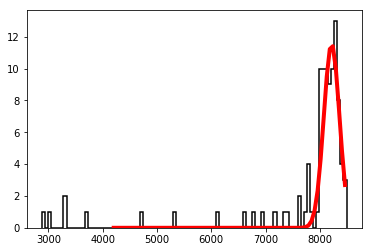

In [54]:
plot_fit_energy(fe)
print_fit_energy(fe)

In [41]:
all_sipms8 = pd.DataFrame()
all_pmts8 = pd.DataFrame()
events_allsensors8 = pd.DataFrame()
events_allsipms8 = pd.DataFrame()
events_allpmts8 = pd.DataFrame()
for file in [test_file]:
    sns_response = pd.read_hdf(file, 'MC/sns_response')
    sns_positions = pd.read_hdf(file, 'MC/sns_positions')

    # Sort to get the sipms
    sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
    sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]

    # Sort to sum up all charges for each sipms
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    response_byid = sipm_response.groupby('sensor_id')
    summed_charges = response_byid.agg({"charge":"sum"}) 

    # Make data frame with sipms ids, position, and total charge
    new_sipm_positions = sipm_positions.set_index('sensor_id')
    new_df = pd.concat([new_sipm_positions.iloc[:,1:5], summed_charges], axis=1)
    all_sipms8 = all_sipms8.append(new_df)
    
    # Sum of charges in an event
    response_byevent = sns_response_sorted.groupby('event_id')
    event_charge = response_byevent.agg({"charge":"sum"})
    events_allsensors8 = events_allsensors8.append(event_charge)
    
    # Sum of charges in sipms per event
    this = sipm_response.groupby('event_id')
    charges = this.agg({"charge":"sum"})
    events_allsipms8 = events_allsipms8.append(charges)
    
    # pmts
    pmt_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] < 60]
    response_byid_pmt = pmt_response.groupby('sensor_id')
    summed_charges_pmt = response_byid_pmt.agg({"charge":"sum"})
    pmt_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("Pmt")]
    new_pmt_positions = pmt_positions.set_index('sensor_id')
    new_df_pmt = pd.concat([new_pmt_positions.iloc[:,1:5], summed_charges_pmt], axis=1)
    all_pmts8 = all_pmts8.append(new_df_pmt)
    
    this_pmts = pmt_response.groupby('event_id')
    charges_pmt = this_pmts.agg({"charge":"sum"})
    events_allpmts8 = events_allpmts8.append(charges_pmt)

NotImplementedError: Support for generic buffers has not been implemented.

In [ ]:
def DrawSiPM(t, s):
    # drawing first side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing second side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing third side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing fourth side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

In [ ]:
import turtle
#x = [x for x in sipm_positions.x]
#y = [y for y in sipm_positions.y]
s = 5 # mm
t = turtle.Turtle() 
window = turtle.Screen()
window.bgcolor("white")
window.exitonclick()

In [ ]:
DrawSiPM(t, s)
t.circle(10)

In [ ]:
import pygame

pygame.init()

white = (255,255,255)
black = (0,0,0)

red = (255,0,0)
green = (0,255,0)
blue = (0,0,255)

gameDisplay = pygame.display.set_mode((800,600))
gameDisplay.fill(black)

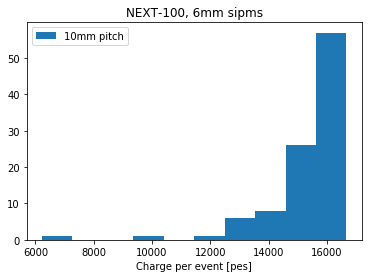

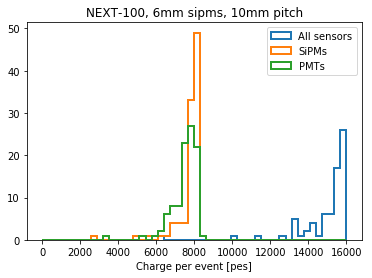

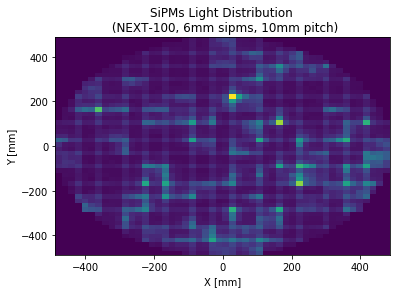

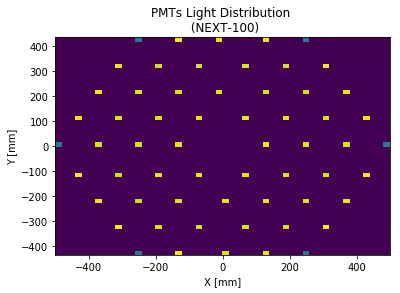

In [14]:
plt.hist(events_allsensors.charge, label="10mm pitch")
#plt.hist(events_allsensors8.charge, label='8mm pitch')
plt.xlabel("Charge per event [pes]")
plt.title("NEXT-100, 6mm sipms")
plt.legend()
plt.show()

plt.hist(events_allsensors.charge, label="All sensors", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.hist(events_allsipms.charge, label="SiPMs", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.hist(events_allpmts.charge, label="PMTs", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.xlabel("Charge per event [pes]")
plt.title("NEXT-100, 6mm sipms, 10mm pitch")
plt.legend()
plt.show()

#plt.hist(events_allsensors8.charge, label="All sensors", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.hist(events_allsipms8.charge, label="SiPMs", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.hist(events_allpmts8.charge, label="PMTs", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.xlabel("Charge per event [pes]")
#plt.title("NEXT-100, 6mm sipms, 8mm pitch")
#plt.legend()
#plt.show()

# Plot sipm positions
#XYrange       =  -500, 500
#hist2d(sipm_positions.x, sipm_positions.y, (25,25), [XYrange, XYrange])
#plt.plot(sipm_positions.x, sipm_positions.y, ".")
#plt.xlim(-50,50)
#plt.ylim(-50,50)
#plt.savefig("sipm_positions.png")
#plt.close()


In [15]:
print(EnergyRes(events_allsensors.charge),EnergyRes(events_allpmts.charge), EnergyRes(events_allsipms.charge))

21.628993668783014 22.42588898078683 22.02654040344236


In [ ]:
y = events_allsipms8.charge.nunique()

In [ ]:
plt.plot(events_allsipms8.apply(lambda x: (x//100)*100).sort_values('charge').charge.value_counts(), 'o')

In [ ]:
x = events_allsipms8.apply(lambda x: (x//100)*100).sort_values('charge').charge
y = x.value_counts()

In [ ]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [ ]:
#popt, pcov = curve_fit(gaus, x.unique(), y)
mean,std=norm.fit(events_allsipms8)

In [ ]:
mean, std